In [40]:
#use the stepwise formula to try to calculate N and Ms for a given number of steps
import sympy as sp
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt
import numpy as np
import warnings
#import scipy
#import time
plt.style.use('dark_background')


In [41]:
ai = sp.Symbol("a_i")
M = sp.Symbol("M")
N = sp.Symbol("N")

aip1 = ai*(1-(2*M/N*(1-(sp.sqrt(1/(M*(ai**2))-1)*sp.sqrt(N/M-1)))))
#aip1 = aip1.simplify()
display(Math("a_{i+1} = " + sp.latex(aip1)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

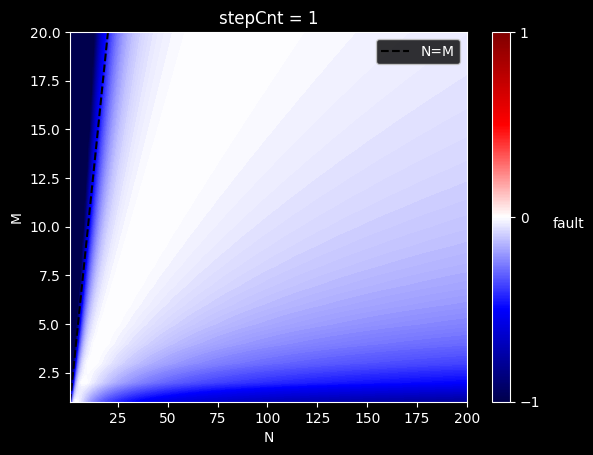

<IPython.core.display.Math object>

invalid value encountered in sqrt
divide by zero encountered in divide
invalid value encountered in multiply


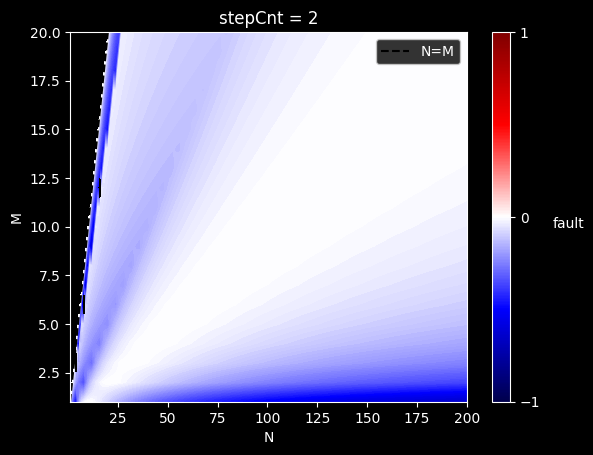

eq too long to display...
invalid value encountered in sqrt
divide by zero encountered in divide
invalid value encountered in multiply


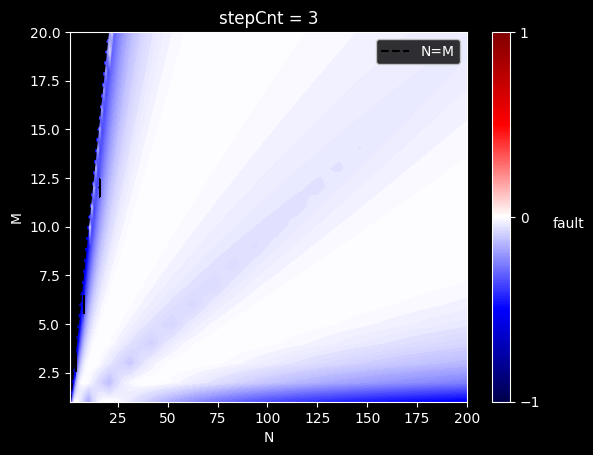

eq too long to display...
invalid value encountered in sqrt
divide by zero encountered in divide
invalid value encountered in multiply


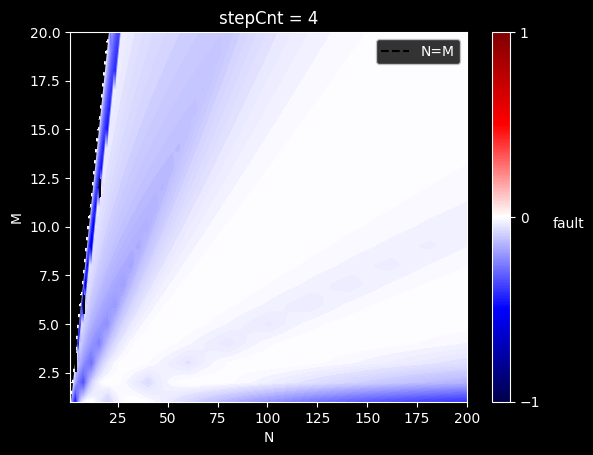

In [42]:
equationMaps = []
NRange = 200
MRange = 20
Ns = np.linspace(1, NRange, NRange)
Ms = np.linspace(1, MRange, MRange)
Ns, Ms = np.meshgrid(Ns, Ms)

for stepCnt in range(4):
    #define formula recursively
    #a0 = 1/sqrt(N)
    #a{stepCnt+1} = 1/sqrt(M)
    a = [1/sp.sqrt(N)]
    for i in range(stepCnt+1):
        form = aip1.subs(ai, a[i])
        a.append(form)
    #set up the equation with a[-1] = 1/sqrt(M)
    eq = a[-1] - 1/sp.sqrt(M)
    if stepCnt <= 1:
        display(Math(sp.latex(eq) + " = 0"))
    else:
        print("eq too long to display...")
    #plot the value of the equation for different values of N and M
    
    #make eq a function of N and M
    with warnings.catch_warnings(record=True) as warn:
        warnings.simplefilter("always")
        eqs = sp.lambdify((N, M), eq, "numpy")
        evaluated = eqs(Ns, Ms)
        warnMsgs = []
        for w in warn:
            if str(w.message) not in warnMsgs:
                warnMsgs.append(str(w.message))
                print(w.message)
            assert issubclass(w.category, RuntimeWarning)
    #make sure the values are between -1 and 1
    evaluated[evaluated < -1] = -1
    evaluated[evaluated > 1] = 1
    #plot with seismic colormap
    plt.figure()
    toPlot = evaluated#(evaluated+1)/2
    #contourplot with minimum at -1 and maximum at 1
    plt.contourf(Ns, Ms, toPlot, 100, cmap="seismic", vmin=-1, vmax=1)
    cMap = plt.cm.get_cmap("seismic")
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=-1, vmax=1), cmap=cMap), ticks=[-1,0,1])
    cbar.set_label('fault', rotation=0, labelpad=20)
    #cbar = plt.colorbar(plt.cm.ScalarMappable(cmap="PiYG"))
    #insert a N=M line
    plt.plot([1, NRange], [1, NRange], color="black", linestyle="--", label="N=M")
    #plot
    plt.legend()
    plt.xlim(1, NRange)
    plt.ylim(1, MRange)
    plt.title("stepCnt = " + str(stepCnt+1))
    plt.xlabel("N")
    plt.ylabel("M")
    plt.show()
    #save the equation map
    equationMaps.append(evaluated)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<lambdifygenerated-172>:2: RuntimeWarning: invalid value encountered in sqrt
  return (-2*M*(2 - N/M)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)/sqrt(N) - 1/sqrt(M)
<lambdifygenerated-172>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return (-2*M*(2 - N/M)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)/sqrt(N) - 1/sqrt(M)
<lambdifygenerated-172>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (-2*M*(2 - N/M)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)/sqrt(N) - 1/sqrt(M)


peaksFor0: [20]
peaksFor0: [30]
peaksFor0: [41]
peaksFor0: [51]
peaksFor0: [62]
peaksFor0: [72]
peaksFor0: [83]
peaksFor0: [93]
peaksFor0: [104]
peaksFor0: [114]
peaksFor0: [125]
peaksFor0: [135]
peaksFor0: [146]
peaksFor0: [156]
peaksFor0: [167]
peaksFor0: [177]
peaksFor0: [187]
peaksFor0: [198]
peaksFor0: [208]
peaksFor0: [219]
peaksFor0: [229]
peaksFor0: [240]
peaksFor0: [250]
peaksFor0: [261]
peaksFor0: [271]
peaksFor0: [282]
peaksFor0: [292]
peaksFor0: [303]
peaksFor0: [313]
peaksFor0: [324]
peaksFor0: [334]
peaksFor0: [345]
peaksFor0: [355]
peaksFor0: [366]
peaksFor0: [376]
peaksFor0: [386]
peaksFor0: [397]
peaksFor0: [407]
peaksFor0: [418]
peaksFor0: [428]
peaksFor0: [439]
peaksFor0: [449]
peaksFor0: [460]
peaksFor0: [470]
peaksFor0: [481]
peaksFor0: [491]
peaksFor0: [502]
peaksFor0: [512]
peaksFor0: [523]
peaksFor0: [533]
peaksFor0: [544]
peaksFor0: [554]
peaksFor0: [564]
peaksFor0: [575]
peaksFor0: [585]
peaksFor0: [596]
peaksFor0: [606]
peaksFor0: [617]
peaksFor0: [627]
peaks

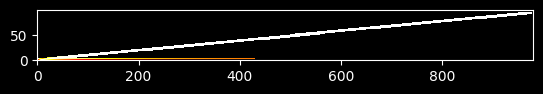

<lambdifygenerated-173>:2: RuntimeWarning: invalid value encountered in sqrt
  return (-2*M*(2 - N/M)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)/sqrt(N) - 1/sqrt(M)
<lambdifygenerated-173>:2: RuntimeWarning: divide by zero encountered in divide
  return (-2*M*(2 - N/M)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)/sqrt(N) - 1/sqrt(M)
<lambdifygenerated-173>:2: RuntimeWarning: invalid value encountered in multiply
  return (-2*M*(2 - N/M)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sq

peaksFor0: [7]
peaksFor0: [11]
peaksFor0: [15]
peaksFor0: [19]
peaksFor0: [23]
peaksFor0: [27]
peaksFor1: [39]
i2use: 0
morePeaks: True
peaksFor0: [31]
peaksFor0: [35]
peaksFor0: [39]
peaksFor0: [43]
peaksFor0: [47]
peaksFor0: [51]
peaksFor0: [55]
peaksFor0: [59]
peaksFor0: [63]
peaksFor1: [60]
i2use: 0
morePeaks: True
peaksFor0: [67]
peaksFor0: [71]
peaksFor0: [75]
peaksFor0: [79]
peaksFor0: [83]
peaksFor0: [87]
peaksFor1: [80]
i2use: 0
morePeaks: True
peaksFor0: [91]
peaksFor0: [95]
peaksFor0: [99]
peaksFor0: [103]
peaksFor0: [107]
peaksFor1: [100]
i2use: 0
morePeaks: True
peaksFor0: [111]
peaksFor0: [115]
peaksFor0: [119]
peaksFor0: [123]
peaksFor0: [127]
peaksFor1: [120]
i2use: 0
morePeaks: True
peaksFor0: [131]
peaksFor0: [135]
peaksFor0: [139]
peaksFor0: [143]
peaksFor0: [147]
peaksFor1: [140]
i2use: 0
morePeaks: True
peaksFor0: [151]
peaksFor0: [155]
peaksFor0: [159]
peaksFor0: [163]
peaksFor0: [167]
peaksFor1: [161]
i2use: 0
morePeaks: True
peaksFor0: [171]
peaksFor0: [175]
pea

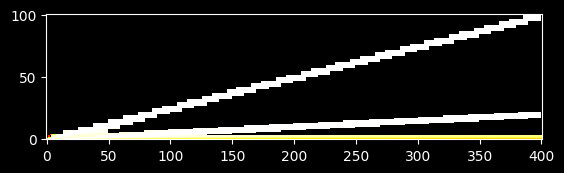

<lambdifygenerated-174>:2: RuntimeWarning: invalid value encountered in sqrt
  return (-2*M*(2 - N/M)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)/sqrt(N) - 1/sqrt(M)
<lambdifygenerated-174>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return (-2*M*(2 - N/M)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/

peaksFor0: [20]
peaksFor0: [30]
peaksFor0: [41]
peaksFor0: [51]
peaksFor0: [62]
peaksFor1: [65]
i2use: 0
morePeaks: True
peaksFor0: [72]
peaksFor0: [83]
peaksFor0: [93]
peaksFor1: [98]
i2use: 0
morePeaks: True
peaksFor0: [104]
peaksFor0: [114]
peaksFor0: [125]
peaksFor0: [135]
peaksFor1: [132]
i2use: 0
morePeaks: True
peaksFor0: [146]
peaksFor0: [156]
peaksFor0: [167]
peaksFor1: [165]
i2use: 0
morePeaks: True
peaksFor0: [177]
peaksFor0: [187]
peaksFor0: [198]
peaksFor1: [198]
i2use: 0
morePeaks: True
peaksFor0: [208]
peaksFor0: [219]
peaksFor0: [229]
peaksFor1: [231]
i2use: 0
morePeaks: True
peaksFor0: [240]
peaksFor0: [250]
peaksFor0: [261]
peaksFor1: [264]
i2use: 0
morePeaks: True
peaksFor0: [271]
peaksFor0: [282]
peaksFor0: [292]
peaksFor1: [297]
i2use: 0
morePeaks: True
peaksFor0: [303]
peaksFor0: [313]
peaksFor0: [324]
peaksFor0: [334]
peaksFor1: [331]
i2use: 0
morePeaks: True
peaksFor0: [345]
peaksFor0: [355]
peaksFor0: [366]
peaksFor1: [364]
i2use: 0
morePeaks: True
peaksFor0: [

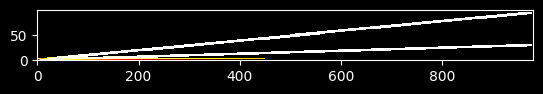

<lambdifygenerated-175>:2: RuntimeWarning: invalid value encountered in sqrt
  return (-2*M*(2 - N/M)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqr

peaksFor0: [7]
peaksFor0: [11]
peaksFor0: [15]
peaksFor0: [19]
peaksFor0: [23]
peaksFor0: [27]
peaksFor1: [39]
i2use: 0
morePeaks: True
peaksFor0: [31]
peaksFor0: [35]
peaksFor0: [39]
peaksFor0: [43]
peaksFor0: [47]
peaksFor0: [51]
peaksFor0: [55]
peaksFor0: [59]
peaksFor0: [63]
peaksFor1: [60]
i2use: 0
morePeaks: True
peaksFor0: [67]
peaksFor0: [71]
peaksFor0: [75]
peaksFor0: [79]
peaksFor0: [83]
peaksFor0: [87]
peaksFor1: [80]
i2use: 0
morePeaks: True
peaksFor0: [91]
peaksFor0: [95]
peaksFor2: [98]
peaksFor0: [99]
peaksFor0: [103]
peaksFor0: [107]
peaksFor1: [100]
i2use: 0
morePeaks: True
peaksFor0: [111]
peaksFor0: [115]
peaksFor0: [119]
peaksFor0: [123]
peaksFor0: [127]
peaksFor1: [120]
i2use: 0
morePeaks: True
peaksFor0: [131]
peaksFor0: [135]
peaksFor0: [139]
peaksFor0: [143]
peaksFor0: [147]
peaksFor1: [140]
i2use: 0
morePeaks: True
peaksFor2: [147]
peaksFor0: [151]
peaksFor0: [155]
peaksFor0: [159]
peaksFor0: [163]
peaksFor0: [167]
peaksFor1: [161]
i2use: 0
morePeaks: True
peak

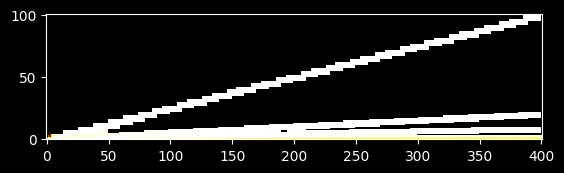

<lambdifygenerated-176>:2: RuntimeWarning: invalid value encountered in sqrt
  return (-2*M*(2 - N/M)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqr

peaksFor0: [20]
peaksFor0: [30]
peaksFor0: [41]
peaksFor0: [51]
peaksFor0: [62]
peaksFor1: [65]
i2use: 0
morePeaks: True
peaksFor0: [72]
peaksFor0: [83]
peaksFor0: [93]
peaksFor1: [98]
i2use: 0
morePeaks: True
peaksFor0: [104]
peaksFor0: [114]
peaksFor0: [125]
peaksFor0: [135]
peaksFor1: [132]
i2use: 0
morePeaks: True
peaksFor2: [137]
peaksFor0: [146]
peaksFor0: [156]
peaksFor0: [167]
peaksFor1: [165]
i2use: 0
morePeaks: True
peaksFor0: [177]
peaksFor0: [187]
peaksFor0: [198]
peaksFor1: [198]
i2use: 0
morePeaks: True
peaksFor0: [208]
peaksFor2: [205]
peaksFor0: [219]
peaksFor0: [229]
peaksFor1: [231]
i2use: 0
morePeaks: True
peaksFor0: [240]
peaksFor0: [250]
peaksFor0: [261]
peaksFor1: [264]
i2use: 0
morePeaks: True
peaksFor0: [271]
peaksFor2: [274]
peaksFor0: [282]
peaksFor0: [292]
peaksFor1: [297]
i2use: 0
morePeaks: True
peaksFor0: [303]
peaksFor0: [313]
peaksFor0: [324]
peaksFor0: [334]
peaksFor1: [331]
i2use: 0
morePeaks: True
peaksFor0: [345]
peaksFor2: [343]
peaksFor0: [355]
pea

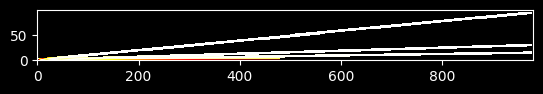

<lambdifygenerated-177>:2: RuntimeWarning: invalid value encountered in sqrt
  return (-2*M*(2 - N/M)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqr

peaksFor0: [7]
peaksFor0: [11]
peaksFor0: [15]
peaksFor0: [19]
peaksFor0: [23]
peaksFor0: [27]
peaksFor1: [39]
i2use: 0
morePeaks: True
peaksFor0: [31]
peaksFor0: [35]
peaksFor0: [39]
peaksFor0: [43]
peaksFor0: [47]
peaksFor0: [51]
peaksFor0: [55]
peaksFor0: [59]
peaksFor0: [63]
peaksFor1: [60]
i2use: 0
morePeaks: True
peaksFor0: [67]
peaksFor0: [71]
peaksFor0: [75]
peaksFor0: [79]
peaksFor0: [83]
peaksFor0: [87]
peaksFor1: [80]
i2use: 0
morePeaks: True
peaksFor0: [91]
peaksFor0: [95]
peaksFor2: [98]
peaksFor3: [98]
peaksFor0: [99]
peaksFor0: [103]
peaksFor0: [107]
peaksFor1: [100]
i2use: 0
morePeaks: True
peaksFor3: [98]
peaksFor0: [111]
peaksFor0: [115]
peaksFor3: [98]
peaksFor0: [119]
peaksFor0: [123]
peaksFor0: [127]
peaksFor1: [120]
i2use: 0
morePeaks: True
peaksFor3: [98]
peaksFor0: [131]
peaksFor0: [135]
peaksFor3: [98]
peaksFor0: [139]
peaksFor0: [143]
peaksFor0: [147]
peaksFor1: [140]
i2use: 0
morePeaks: True
peaksFor2: [147]
peaksFor3: [98]
peaksFor0: [151]
peaksFor0: [155]
p

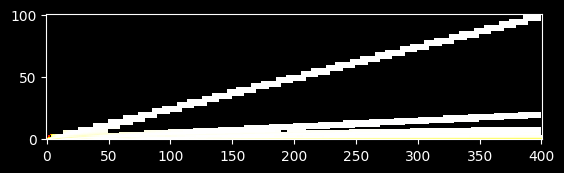

<lambdifygenerated-178>:2: RuntimeWarning: invalid value encountered in sqrt
  return (-2*M*(2 - N/M)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqr

peaksFor0: [20]
peaksFor0: [30]
peaksFor0: [41]
peaksFor0: [51]
peaksFor0: [62]
peaksFor1: [65]
i2use: 0
morePeaks: True
peaksFor0: [72]
peaksFor0: [83]
peaksFor0: [93]
peaksFor1: [98]
i2use: 0
morePeaks: True
peaksFor0: [104]
peaksFor0: [114]
peaksFor0: [125]
peaksFor0: [135]
peaksFor1: [132]
i2use: 0
morePeaks: True
peaksFor2: [137]
peaksFor3: [137]
peaksFor0: [146]
peaksFor3: [137]
peaksFor0: [156]
peaksFor3: [137]
peaksFor0: [167]
peaksFor1: [165]
i2use: 0
morePeaks: True
peaksFor3: [137]
peaksFor0: [177]
peaksFor3: [137]
peaksFor0: [187]
peaksFor3: [137]
peaksFor0: [198]
peaksFor1: [198]
i2use: 0
morePeaks: True
peaksFor3: [137]
peaksFor0: [208]
peaksFor2: [205]
peaksFor3: [137]
peaksFor3: [137]
peaksFor0: [219]
peaksFor3: [137]
peaksFor0: [229]
peaksFor1: [231]
i2use: 0
morePeaks: True
peaksFor3: [137 234]
peaksFor0: [240]
peaksFor0: [250]
peaksFor0: [261]
peaksFor1: [264]
i2use: 0
morePeaks: True
peaksFor0: [271]
peaksFor2: [274]
peaksFor0: [282]
peaksFor0: [292]
peaksFor1: [297

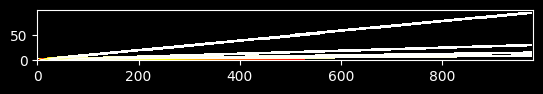

<lambdifygenerated-179>:2: RuntimeWarning: invalid value encountered in sqrt
  return (-2*M*(2 - N/M)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqr

peaksFor0: [7]
peaksFor0: [11]
peaksFor0: [15]
peaksFor0: [19]
peaksFor0: [23]
peaksFor0: [27]
peaksFor1: [39]
i2use: 0
morePeaks: True
peaksFor0: [31]
peaksFor0: [35]
peaksFor0: [39]
peaksFor0: [43]
peaksFor0: [47]
peaksFor0: [51]
peaksFor0: [55]
peaksFor0: [59]
peaksFor0: [63]
peaksFor1: [60]
i2use: 0
morePeaks: True
peaksFor0: [67]
peaksFor0: [71]
peaksFor0: [75]
peaksFor0: [79]
peaksFor0: [83]
peaksFor0: [87]
peaksFor1: [80]
i2use: 0
morePeaks: True
peaksFor0: [91]
peaksFor0: [95]
peaksFor2: [98]
peaksFor3: [98]
peaksFor0: [99]
peaksFor0: [103]
peaksFor0: [107]
peaksFor1: [100]
i2use: 0
morePeaks: True
peaksFor3: [98]
peaksFor0: [111]
peaksFor0: [115]
peaksFor3: [98]
peaksFor0: [119]
peaksFor0: [123]
peaksFor0: [127]
peaksFor1: [120]
i2use: 0
morePeaks: True
peaksFor3: [98]
peaksFor0: [131]
peaksFor0: [135]
peaksFor3: [98]
peaksFor0: [139]
peaksFor0: [143]
peaksFor0: [147]
peaksFor1: [140]
i2use: 0
morePeaks: True
peaksFor2: [147]
peaksFor3: [98]
peaksFor0: [151]
peaksFor0: [155]
p

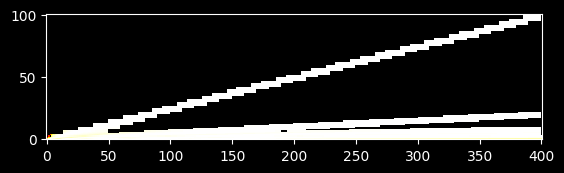

<lambdifygenerated-180>:2: RuntimeWarning: invalid value encountered in sqrt
  return (-2*M*(2 - N/M)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqrt(-1 + N/(M*(-2*M*(2 - N/M)/N + 1)**2)) + 1)/N + 1)**2)) + 1)/N + 1)**2*(-2*M*(-sqrt(-1 + N/M)*sqr

peaksFor0: [20]
peaksFor0: [30]
peaksFor0: [41]
peaksFor0: [51]
peaksFor0: [62]
peaksFor1: [65]
i2use: 0
morePeaks: True
peaksFor0: [72]
peaksFor0: [83]
peaksFor0: [93]
peaksFor1: [98]
i2use: 0
morePeaks: True
peaksFor0: [104]
peaksFor0: [114]
peaksFor0: [125]
peaksFor0: [135]
peaksFor1: [132]
i2use: 0
morePeaks: True
peaksFor2: [137]
peaksFor3: [137]
peaksFor0: [146]
peaksFor3: [137]
peaksFor0: [156]
peaksFor3: [137]
peaksFor0: [167]
peaksFor1: [165]
i2use: 0
morePeaks: True
peaksFor3: [137]
peaksFor0: [177]
peaksFor3: [137]
peaksFor0: [187]
peaksFor3: [137]
peaksFor0: [198]
peaksFor1: [198]
i2use: 0
morePeaks: True
peaksFor3: [137]
peaksFor0: [208]
peaksFor2: [205]
peaksFor3: [137]
peaksFor3: [137]
peaksFor0: [219]
peaksFor3: [137]
peaksFor0: [229]
peaksFor1: [231]
i2use: 0
morePeaks: True
peaksFor3: [137 234]
peaksFor4: [234]
peaksFor0: [240]
peaksFor4: [234]
peaksFor0: [250]
peaksFor4: [234]
peaksFor0: [261]
peaksFor1: [264]
i2use: 0
morePeaks: True
peaksFor4: [234]
peaksFor0: [271

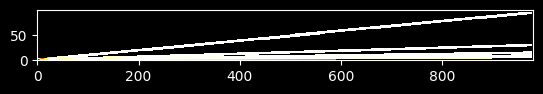

In [47]:
#use the stepwise formula to try to calculate N and Ms for a given number of steps
import sympy as sp
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt
import numpy as np
import warnings
from numba import jit
#import scipy
#import time
plt.style.use('dark_background')

ai = sp.Symbol("a_i")
M = sp.Symbol("M")
N = sp.Symbol("N")

aip1 = ai*(1-(2*M/N*(1-(sp.sqrt(1/(M*(ai**2))-1)*sp.sqrt(N/M-1)))))
#aip1 = aip1.simplify()
display(Math("a_{i+1} = " + sp.latex(aip1)))

def widenSearchSpace(searchspace,newN,newM):
    if newN < searchspace.shape[0]:
        newN = searchspace.shape[0]
    if newM < searchspace.shape[1]:
        newM = searchspace.shape[1]
    newSpace = np.full((newN+1,newM+1),np.nan,dtype=float)
    newSpace[:searchspace.shape[0],:searchspace.shape[1]] = searchspace
    return newSpace
def getNewSpace2Search(searchspace,linearLines):
    if len(linearLines) == 0:
        #first iteration
        newN = np.arange(1,searchspace.shape[0]+20)
        newM = np.arange(1,searchspace.shape[1]+1)
        newN, newM = np.meshgrid(newN, newM)
        newN = newN.flatten()
        newM = newM.flatten()
    else:
        #evalueate by finding end tips of linear fits
        #find the end tips of the linear fits
        endTips = []
        for fit in linearLines:
            endTips.append([fit[-1][0], fit[-1][1]])
        #print("endTips:", endTips)
        newN = []
        newM = []
        #find the new search space
        for et in endTips:
            x1, x2 = et[0], et[0]
            y1, y2 = et[1], et[1]
            x1 -= -0
            x2 = max(x2+5, searchspace.shape[0]+10)
            y1 -= 0
            y2 += 5
            if x1 < 1: x1 = 1
            if y1 < 1: y1 = 1
            newNpart = np.arange(x1,x2)
            newMpart = np.arange(y1,y2)
            newNpart, newMpart = np.meshgrid(newNpart, newMpart)
            newNpart = newNpart.flatten()
            newMpart = newMpart.flatten()
            newN = np.concatenate((newN, newNpart))
            newM = np.concatenate((newM, newMpart))
    newN = newN.flatten().astype(int)
    newM = newM.flatten().astype(int)
    return [newN, newM]
def findPeaksOfLine(line):
    #find peaks of line
    peaks = []
    for i in range(1, len(line)-1):
        if np.isnan(line[i]) or np.isnan(line[i-1]) or np.isnan(line[i+1]):
            continue
        if line[i] >= line[i-1] and line[i] >= line[i+1]:
            peaks.append(i)
    return peaks
def createLinearFits(searchspace, oldLinearFits):
    if len(oldLinearFits) == 0:
        botRow = searchspace.T[0]
        peaks = findPeaksOfLine(botRow)
        peaks = [[[p, 0]] for p in peaks]
        return peaks
    else:
        botRow = searchspace.T[0]
        maxN = oldLinearFits[-1][0][0]
        botRow = botRow[maxN:]
        botPeaks = np.array(findPeaksOfLine(botRow))+maxN
        for p in botPeaks:
            oldLinearFits.append([[p, 0]])
        for i in range(len(oldLinearFits)):
            morePeaks = True
            while morePeaks:
                lastPoint = oldLinearFits[i][-1]
                M1 = lastPoint[1]+1
                N1 = lastPoint[0]
                M2 = M1
                N2 = len(searchspace.T[M1-1])
                row2search = searchspace.T[M1][N1:N2]
                peaks = np.array(findPeaksOfLine(row2search))
                if len(peaks) == 0:
                    morePeaks = False
                    continue
                peaks += N1
                print(f"peaksFor{i}:", peaks)
                i2use = 0
                def peakInOtherFits(p, cutOldFits):
                    for fit in cutOldFits:
                        for point in fit:
                            if point[0] == p:
                                if point[1] == M1:
                                    return True
                    return False
                while peakInOtherFits(peaks[i2use], oldLinearFits[:i]):
                    i2use += 1
                    if i2use >= len(peaks):
                        morePeaks = False
                        break
                if i == 1: print("i2use:", i2use)
                if i == 1: print("morePeaks:", morePeaks)
                if not morePeaks:
                    continue
                peaks = peaks[i2use:]
                addition = peaks[0]
                addition = [[addition, M1]]
                oldLinearFits[i] += addition
        return oldLinearFits

def evaluateNewSpace(searchspace,NMlist):
    for NM in np.transpose(NMlist):
        N = NM[0]
        M = NM[1]
        if not np.isnan(searchspace[N-1,M-1]):
            continue
        #print("evaluating point:", N, M)
        searchspace[N-1,M-1] = evaluatePoint(N,M)
        #print("value:", searchspace[N-1,M-1])
    return searchspace
def evaluateNewSpace_vectorized(searchspace,NMlist):
    NMlist = np.transpose(NMlist)
    Ns = NMlist[:,0]
    Ms = NMlist[:,1]
    searchspace[Ns-1,Ms-1] = evaluatePoint(Ns,Ms)
    return searchspace
def evaluateBottomRow(searchspace):
    #evaluate the left 3 rows
    bottomRow = searchspace[:,:3]
    for i in range(len(bottomRow)):
        Ms = np.arange(1,bottomRow.shape[1]+1)
        Ns = np.full(Ms.shape[0],i+1)
        Ns, Ms = np.meshgrid(Ns, Ms)
        Ns = Ns.flatten()
        Ms = Ms.flatten()
        bottomRow = evaluateNewSpace(bottomRow, [Ns, Ms])
    searchspace[:,:3] = bottomRow
    return searchspace

equationMaps = []
equationLines = []
for stepCnt in range(1, 10):
    #equation init
    ai = sp.Symbol("a_i")
    M = sp.Symbol("M")
    N = sp.Symbol("N")
    a = [1/sp.sqrt(N)]
    for i in range(stepCnt+1):
        form = aip1.subs(ai, a[i])
        a.append(form)
    #set up the equation with a[-1] = 1/sqrt(M)
    eq = a[-1] - 1/sp.sqrt(M)
    if stepCnt <= 1:
        display(Math(sp.latex(eq) + " = 0"))
    eqs = sp.lambdify((N, M), eq, "numpy")
    def evaluatePoint(N,M):
        #print("evaluating point:", N, M)
        #if M <= N:
        return eqs(N,M)
        return np.nan
        

    searchSpace = np.full((1,1),np.nan,dtype=float)
    linearLines = []
    from timeit import default_timer as timer
    start = timer()
    delta = 0
    counter = 0
    counterSinceLastNewLine = 0
    doBotRow = True
    while len(searchSpace[0]) < 100:
        counter += 1
        #print("break;")
        #print("searchSpace.shape:", searchSpace.shape)
        evaluationSpace = getNewSpace2Search(searchSpace,linearLines)
        #print("time:", -delta+(delta:=timer()-start), "seconds")
        time1 = -delta+(delta:=timer()-start)
        searchSpace = widenSearchSpace(searchSpace,max(evaluationSpace[0]),max(evaluationSpace[1]))
        #print("time:", -delta+(delta:=timer()-start), "seconds")
        time2 = -delta+(delta:=timer()-start)
        #searchSpace = evaluateNewSpace(searchSpace,evaluationSpace)
        searchSpace = evaluateNewSpace_vectorized(searchSpace,evaluationSpace)
        #print("time:", -delta+(delta:=timer()-start), "seconds")
        time3 = -delta+(delta:=timer()-start)
        if doBotRow:
            searchSpace = evaluateBottomRow(searchSpace)
        #print("time:", -delta+(delta:=timer()-start), "seconds")
        time4 = -delta+(delta:=timer()-start)
        lineCnt = len(linearLines)
        linearLines = createLinearFits(searchSpace, linearLines)
        if len(linearLines) > lineCnt:
            counterSinceLastNewLine = 0
        else:
            counterSinceLastNewLine += 1
        if counterSinceLastNewLine > 40:
            doBotRow = False
        #print("time:", -delta+(delta:=timer()-start), "seconds")
        time5 = -delta+(delta:=timer()-start)
        #print("linearLines:")
        #for line in linearLines: print(line)
        #print("space shape:", searchSpace.shape)
    print("counter:", counter)
    print("lineCnt:", len(linearLines))
    print("linearLines:")
    for line in linearLines: print(line)
    print("time1:", time1)
    print("time2:", time2)
    print("time3:", time3)
    print("time4:", time4)
    print("time5:", time5)
    fig = plt.figure()
    plt.imshow(searchSpace.T, cmap='hot', interpolation='nearest', origin='lower')
    plt.show()
    equationMaps.append(searchSpace)
    equationLines.append(linearLines)

[9, 0] [973, 92]


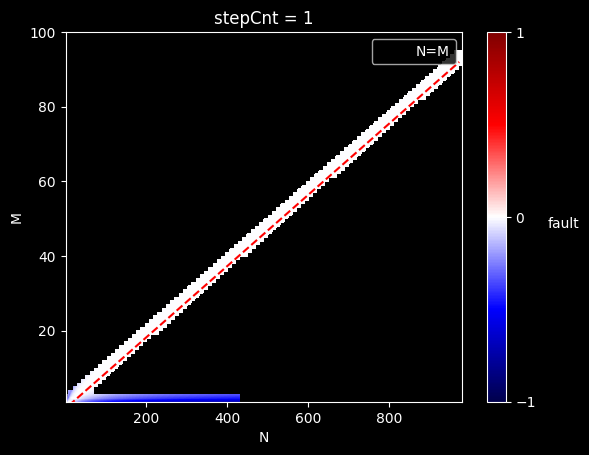

[3, 0] [395, 98]
[19, 0] [383, 18]


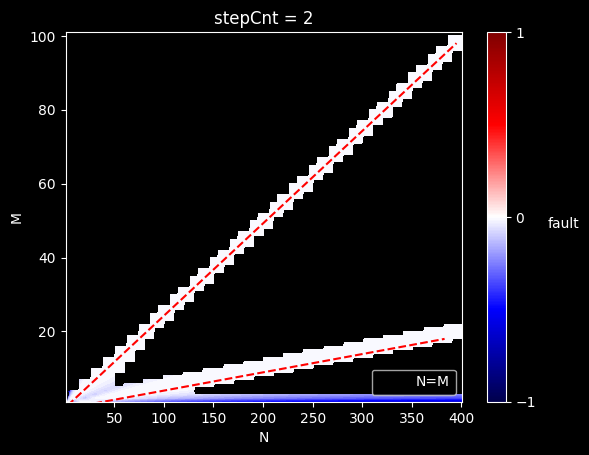

[9, 0] [973, 92]
[32, 0] [961, 28]


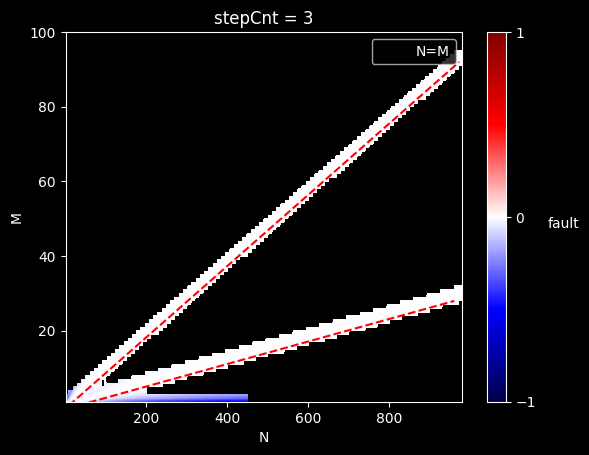

[3, 0] [395, 98]
[19, 0] [383, 18]
[48, 0] [394, 7]


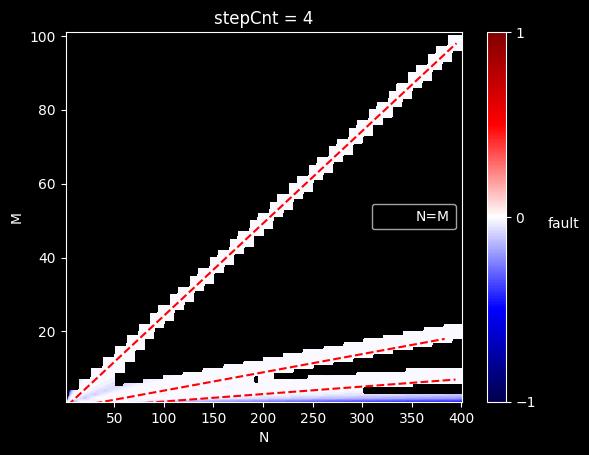

[9, 0] [973, 92]
[32, 0] [961, 28]
[68, 0] [963, 13]


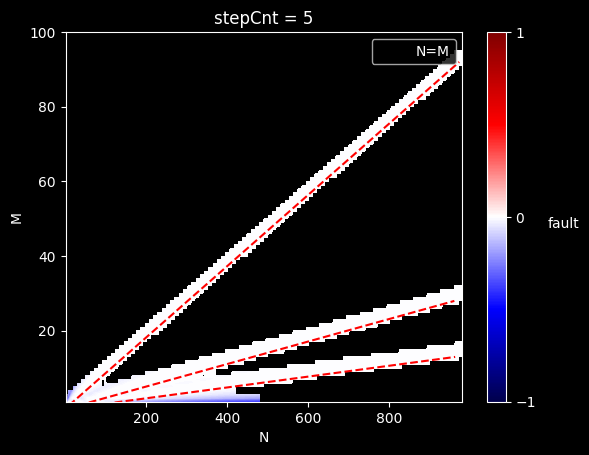

[3, 0] [395, 98]
[19, 0] [383, 18]
[48, 0] [394, 7]
[91, 0] [365, 3]


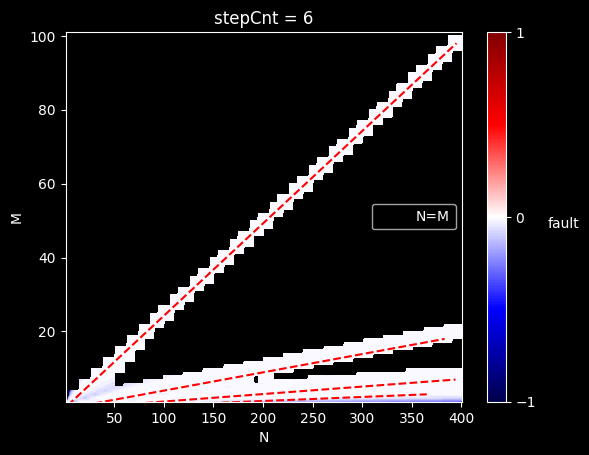

[9, 0] [973, 92]
[32, 0] [961, 28]
[68, 0] [963, 13]
[116, 0] [939, 7]


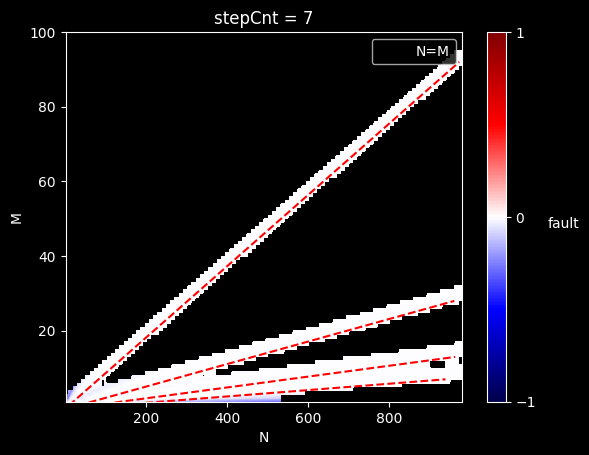

[3, 0] [395, 98]
[19, 0] [383, 18]
[48, 0] [394, 7]
[91, 0] [365, 3]
[146, 0] [292, 1]


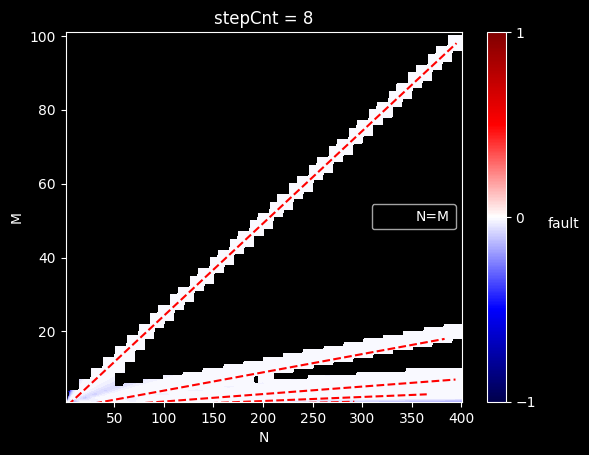

[9, 0] [973, 92]
[32, 0] [961, 28]
[68, 0] [963, 13]
[116, 0] [939, 7]
[178, 0] [894, 4]


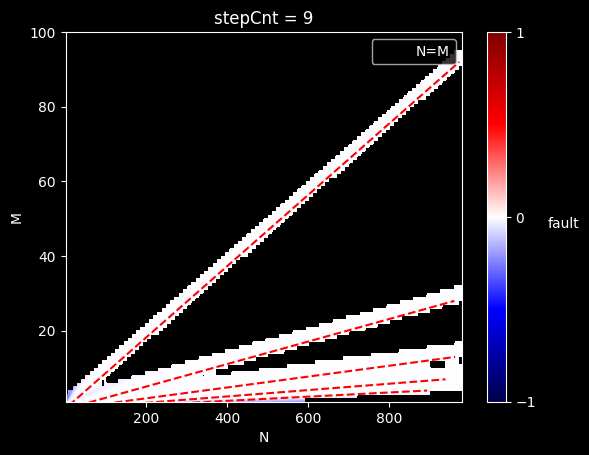

In [48]:

for stepC in range(1,stepCnt+1):
    mapAtStep = equationMaps[stepC-1]
    linearLines = equationLines[stepC-1]
    """print("mapShape:", mapAtStep.shape)
    #foundPoints = locateOptimumLineWithStartPoint(Ns,Ms,mapAtStep,startCord)
    endM = 1
    i = 0
    foundPoints = {}
    while endM < 0.9*MRange and endM != 0:
        #calc cuttoffindex by endM
        MSlice = Ms[:,0]
        cuttoff = np.where(MSlice == endM)
        while True:
            try:
                cuttoff[0]
                cuttoff = cuttoff[0]
            except:
                break
        cuttoff += 1
        foundPoints[i], endM = locateOptimumLineBySlicing(Ns[cuttoff:],Ms[cuttoff:],mapAtStep[cuttoff:])#!TODO: fix this one
        i += 1"""
    #seperate foundPoints in x and y
    #plot
    Ns = np.arange(1,mapAtStep.shape[0]+1)
    Ms = np.arange(1,mapAtStep.shape[1]+1)
    Ns, Ms = np.meshgrid(Ns, Ms)
    plt.figure()
    plt.contourf(Ns, Ms, mapAtStep.T, 100, cmap="seismic", vmin=-1, vmax=1)
    cMap = plt.cm.get_cmap("seismic")
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=-1, vmax=1), cmap=cMap), ticks=[-1,0,1])
    cbar.set_label('fault', rotation=0, labelpad=20)
    #plot found points
    for line in linearLines:
        #label = "wholestep" if i == 0 and k == 0 else None
        print(line[0], line[-1])
        plt.plot([line[0][0],line[-1][0]], [line[0][1],line[-1][1]], color="red", linestyle="--")
    """for k in foundPoints.keys():
        for i in range(len(foundPoints[k])):
            label = "wholestep" if i == 0 and k == 0 else None
            plt.plot(foundPoints[k][i][0], foundPoints[k][i][1], color="red", linestyle="--", label=label)"""
    #insert a N=M line
    plt.plot([1, max(mapAtStep.shape)], [1, max(mapAtStep.shape)], color="black", linestyle="--", label="N=M")
    #plot
    plt.legend()
    plt.xlim(1, mapAtStep.shape[0])
    plt.ylim(1, mapAtStep.shape[1])
    plt.title("stepCnt = " + str(stepC))
    plt.xlabel("N")
    plt.ylabel("M")
    plt.show()
    #save found points


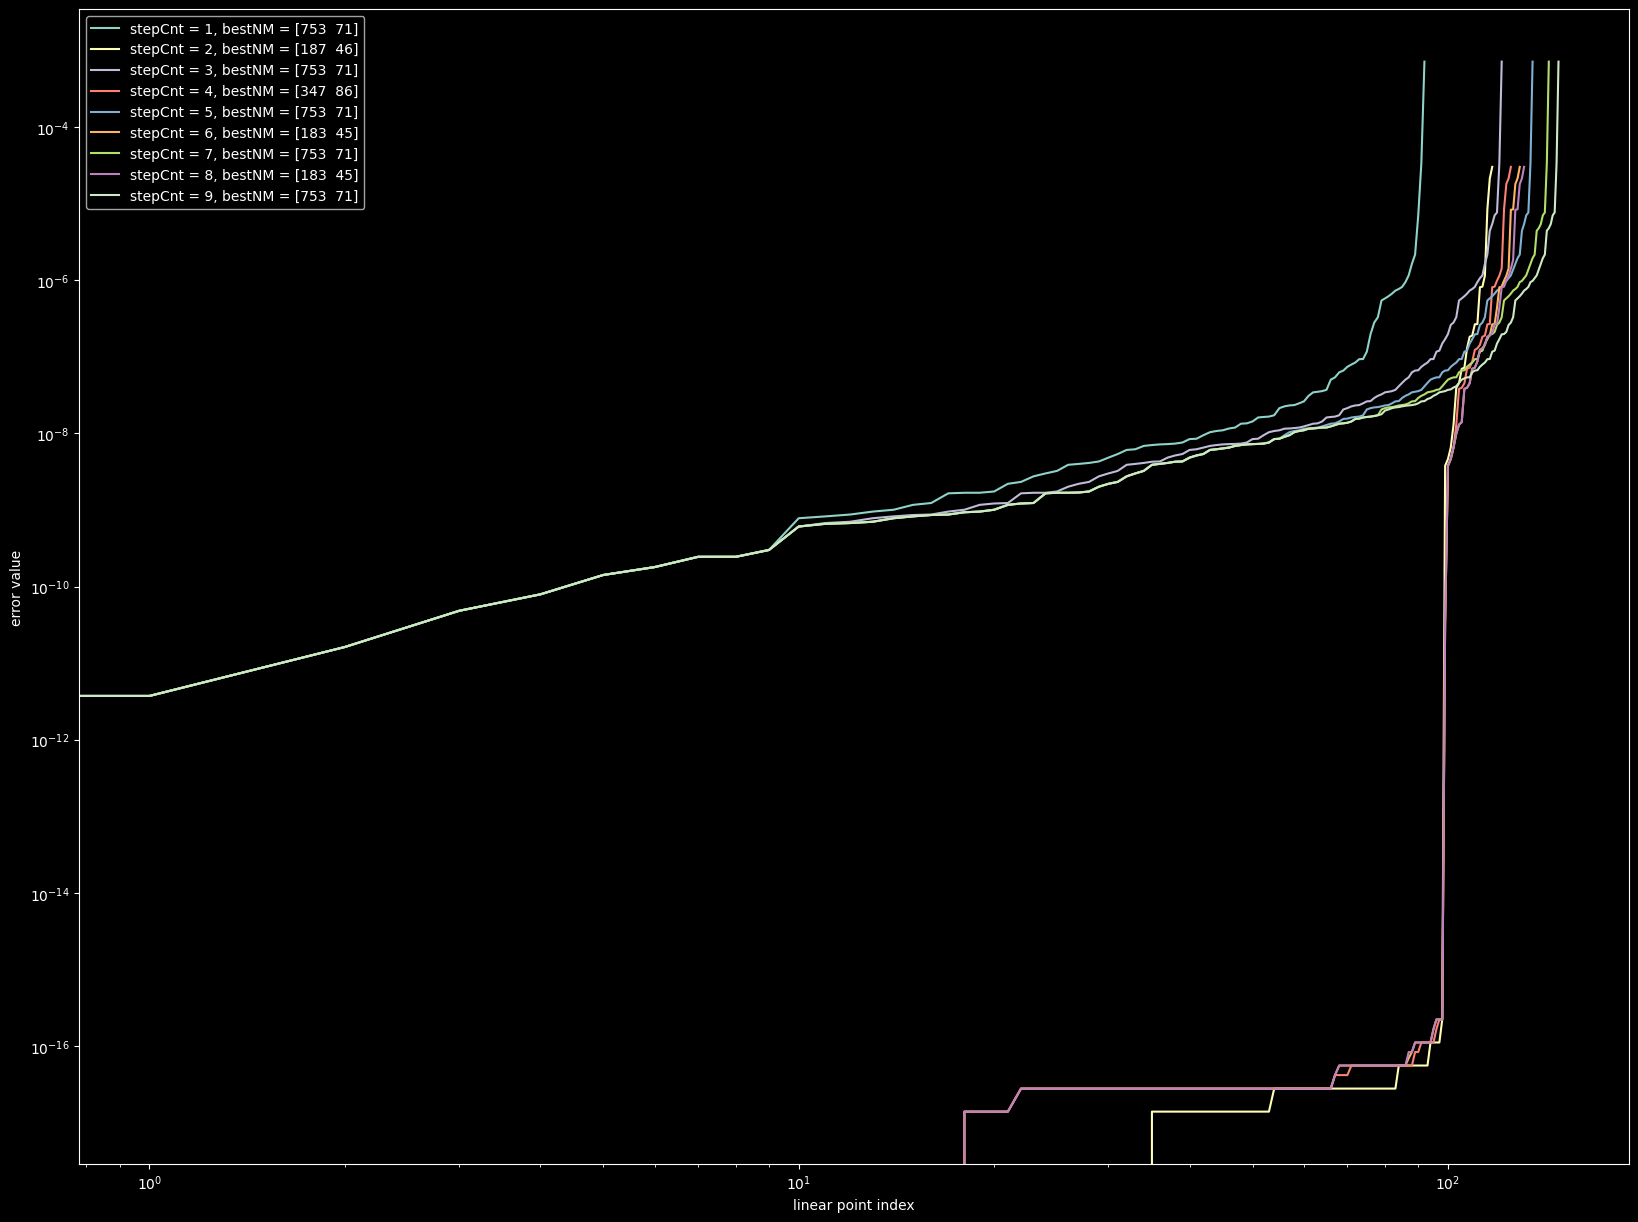

In [52]:
#for all points in the linear lines, look up the errorvalue in the map, and sort it to plot a histogram of lowest error values first
onlyfirstline = False
onlylastline = False
plt.figure(figsize=(20,15))
for stepC in range(1,stepCnt+1):
    eqMap = equationMaps[stepC-1]
    eqMap = np.abs(eqMap)
    linearLines = equationLines[stepC-1]
    #find all points in the linear lines
    linearPoints = []
    for i in range(len(linearLines)):
        linearPoints += list(np.asarray(linearLines[i]).flatten())
        if onlyfirstline: break
    if onlylastline: linearPoints = list(np.asarray(linearLines[-1]).flatten())
    linearPoints = np.array(linearPoints).flatten()
    linearPoints = np.reshape(linearPoints, (-1,2))
    #find all error values for the linear points
    errorValues = []
    for i in range(len(linearPoints)):
        point = linearPoints[i]
        errorValues.append(eqMap[int(point[0]), int(point[1])])
    #sort the error values
    errorValues = np.asarray(errorValues)
    sort = np.argsort(errorValues)
    errorValues = errorValues[sort]
    linearPoints = linearPoints[sort]
    #plot
    
    plt.loglog(errorValues, label=f"stepCnt = {stepC}, bestNM = {linearPoints[0]}")
plt.xlabel("linear point index")
plt.ylabel("error value")
plt.legend()
plt.show()
    

